<a href="https://colab.research.google.com/github/Arucaden/PCVK-2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Daffa Maulana Satria

Kelas : TI-3D

NIM   : 2241720105

# MODUL 3 - Operasi Citra Sederhana - Linier Brightness, Contrast, Inverse, Logarithmic Brightness, dan Grayscale Image

##Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Mengubah tingkat kecerahan citra
----------------------------------
Masukkan nilai kecerahan: 50


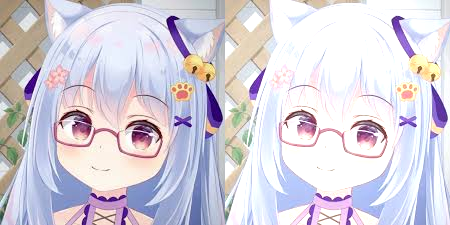

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import random

path = '/content/drive/MyDrive/image_2024-09-15_215126914.png'
original = cv.imread(path)

print('Mengubah tingkat kecerahan citra')
print('----------------------------------')

try :
  brightness = int(input("Masukkan nilai kecerahan: "))
except ValueError:
  print('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Tugas Praktikum

1.  Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

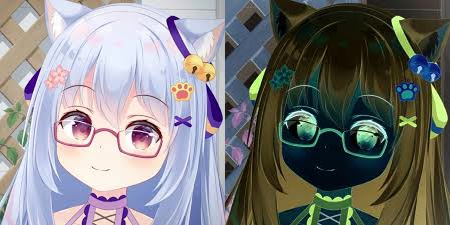

In [4]:
path = '/content/drive/MyDrive/image_2024-09-15_215126914.png'
img = cv.imread(path)

img_inverse = 255 - img
final_frame = cv.hconcat((img, img_inverse))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras

Masukkan tingkat kecerahan:50
Masukkan kontras:2


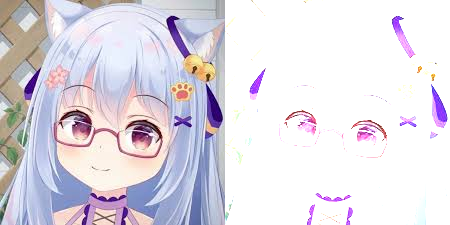

In [6]:
try:
  brightness = int(input('Masukkan tingkat kecerahan:'))
  contrast = int(input('Masukkan kontras:'))
except ValueError:
  print('Error, not a number')

brightness_image = np.zeros(original.shape,original.dtype)

for y in range(original.shape[0]):
 for x in range(original.shape[1]):
  for c in range(original.shape[2]):
    brightness_image[y,x,c] = np.clip(contrast * original[y,x,c]+ brightness,0,255)

final_frame =cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log

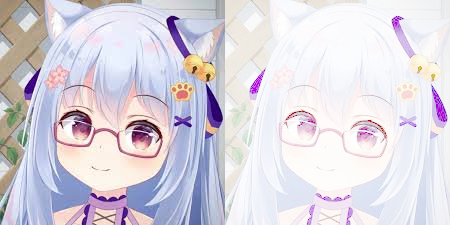

In [8]:
img2 = np.float32(original)
img_logarithmic_brightness = 1 * np.log(1 + img2)

img_logarithmic_brightness = cv.normalize(img_logarithmic_brightness, None, 0, 255, cv.NORM_MINMAX)
img_logarithmic_brightness = np.uint8(img_logarithmic_brightness)

final_frame = cv.hconcat((original, img_logarithmic_brightness))
cv2_imshow(final_frame)

4.  Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

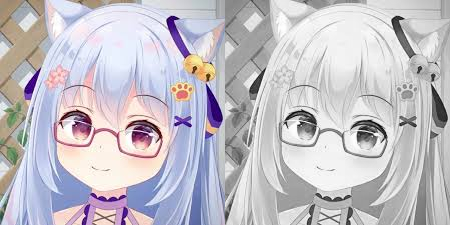

In [9]:
gray_image = np.mean(img, axis=2).astype(np.uint8)

gray_image_3ch = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

img3 = img.astype(np.uint8)

final_frame = cv.hconcat((img3, gray_image_3ch))
cv2_imshow(final_frame)

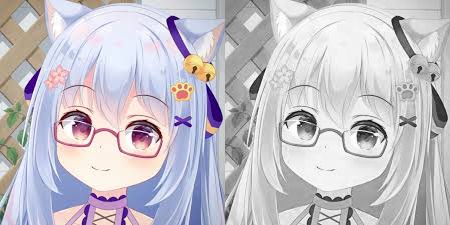

In [10]:
image = cv.imread(path)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      blue,green,red = map(float, image[y, x])
      gray_value = int((max(red,green,blue)+min(red,green,blue))/2)
      image[y,x] =(gray_value,gray_value,gray_value)

final_frame = cv.hconcat((img,image))
cv2_imshow(final_frame)

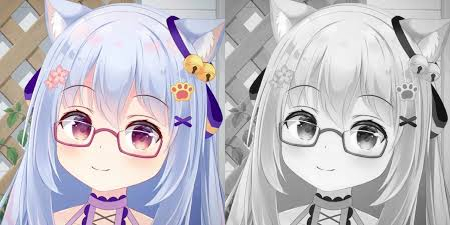

In [11]:
gray_image_luminance = np.zeros(img.shape[:2], img.dtype)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    red = img[y, x, 2]
    green = img[y, x, 1]
    blue = img[y, x, 0]
    gray_image_luminance[y, x] = 0.2126 * red + 0.7152 * green + 0.0722 * blue

gray_image_luminance_3ch = cv.cvtColor(gray_image_luminance, cv.COLOR_GRAY2BGR)

final_frame = cv.hconcat((img, gray_image_luminance_3ch))
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

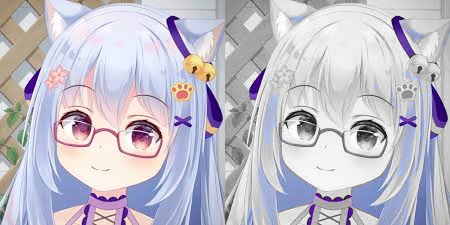

In [12]:
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

blue_mask = cv.inRange(hsv_img, lower_blue, upper_blue)

blue_mask_img = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        b, g, r = img[y, x]

        if blue_mask[y, x] > 0:
            blue_mask_img[y, x] = [b, g, r]

        else:
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)
            blue_mask_img[y, x] = [gray, gray, gray]

final_frame = cv.hconcat((img, blue_mask_img))
cv2_imshow(final_frame)